In [1]:
import numpy as np
import scipy.spatial
import matplotlib.pyplot as plt

from tectosaur.fmm.ts_terms import *

In [2]:
n_src = 100
n_obs = 500
orders = list(range(2, 10))
acc = []
MACS = [1.5, 2.5, 3.5, 4.5]
src_pts = np.random.rand(n_src, 3) - 0.5
STR = np.random.rand(n_src)
for MAC in MACS:
    acc.append([])
    np.random.seed(1122)
    obs_pts = np.random.rand(n_obs, 3) * 10.0
    obs_pts = obs_pts[np.where(np.linalg.norm(obs_pts, axis = 1) > MAC)[0],:]

    r = scipy.spatial.distance.cdist(src_pts, obs_pts)
    correct = np.sum((1.0 / r).T * STR, axis = 1)


    exp_pt = np.array((0,0,0))
    src_sep = src_pts - exp_pt[np.newaxis,:]

    for order in orders:
        Rsumreal = np.zeros((order + 1, 2 * order + 1))
        Rsumimag = np.zeros((order + 1, 2 * order + 1))
        for i in range(src_sep.shape[0]):
            Rvr, Rvi = R(order, src_sep[i,:])
            Rsumreal += Rvr * STR[i]
            Rsumimag += Rvi * STR[i]

        obs_sep = obs_pts - exp_pt[np.newaxis,:]
        result = np.zeros(obs_pts.shape[0])
        for i in range(obs_sep.shape[0]):
            Svr, Svi = S(order, obs_sep[i,:])
            result[i] += np.sum(Svr * Rsumreal + Svi * Rsumimag)
        n_multipole = (order + 1) * (2 * order + 1)
        print(n_src * n_obs, n_src * n_multipole + n_multipole * n_obs)
        print(order, n_multipole, (result - correct)[-1], result[-1], correct[-1])
        acc[-1].append(np.sqrt(np.sum((result - correct) ** 2) / np.sum(correct ** 2)))

50000 9000
2 15 -0.00018319670657529485 6.271746128000226 6.271929324706801
50000 16800
3 28 -2.3329099560598365e-05 6.2719059956072405 6.271929324706801
50000 27000
4 45 -7.620093853688559e-07 6.271928562697416 6.271929324706801
50000 39600
5 66 -3.110147428486698e-08 6.271929293605327 6.271929324706801
50000 54600
6 91 -1.373463121012719e-09 6.271929323333338 6.271929324706801
50000 72000
7 120 -3.076028320947444e-11 6.271929324676041 6.271929324706801
50000 91800
8 153 -2.0198953620820248e-11 6.271929324686602 6.271929324706801
50000 114000
9 190 8.775202786637237e-13 6.271929324707679 6.271929324706801
50000 9000
2 15 -0.00018319670657529485 6.271746128000226 6.271929324706801
50000 16800
3 28 -2.3329099560598365e-05 6.2719059956072405 6.271929324706801
50000 27000
4 45 -7.620093853688559e-07 6.271928562697416 6.271929324706801
50000 39600
5 66 -3.110147428486698e-08 6.271929293605327 6.271929324706801
50000 54600
6 91 -1.373463121012719e-09 6.271929323333338 6.271929324706801
5000

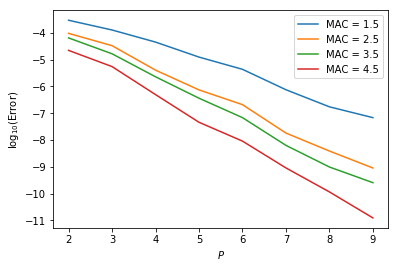

In [12]:
for i, M in enumerate(MACS):
    plt.plot(orders, np.log10(np.abs(acc[i])), label = 'MAC = ' + str(M))
plt.legend()
plt.xlabel('$P$')
plt.ylabel('$\log_{10}(\mathrm{Error})$')
plt.show()